# Classifying Fashion-MNIST

We'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.
<p align="center">
<img src='https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/fashion-mnist-sprite.png?raw=1' width=500px>
</p>
In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [0]:
# --- Helper Functions

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [0]:
import torch
from torchvision import datasets, transforms
#import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

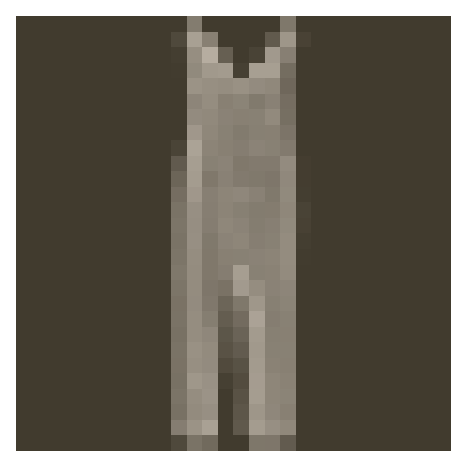

In [158]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [0]:
# Define your network architecture here
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        self.dropout = nn.Dropout(p=0.2)
    def forward(self,x):
        x = x.view(x.shape[0], -1) #flattening tensor in the forward pass itself
        # x[0] gives the batch size
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [0]:
# TODO: Create the network, define the criterion and optimizer
model = Network()
criterion = nn.NLLLoss() #because we're using log_softmax above
optimizer = optim.Adam(model.parameters(), lr=10e-4)

In [161]:
# TODO: Train the network here
epochs = 30
losses = []
ep = []
for e in range(epochs):
    runloss = 0
    for images,labels in trainloader:
        logps = model(images) #log probabilities, runs the forward method
        loss = criterion(logps, labels) #calculate loss
        optimizer.zero_grad() #clear out all gradients
        loss.backward()
        optimizer.step()
        runloss += loss.item()
    print("Epoch:",e," Training Loss:",runloss/len(trainloader))
    ep.append(e)
    losses.append(runloss/len(trainloader))

Epoch: 0  Training Loss: 0.6102008312813508
Epoch: 1  Training Loss: 0.4342606275129928
Epoch: 2  Training Loss: 0.39459122128006235
Epoch: 3  Training Loss: 0.37218987457215913
Epoch: 4  Training Loss: 0.3528000379342641
Epoch: 5  Training Loss: 0.3425229360013882
Epoch: 6  Training Loss: 0.3310652732817349
Epoch: 7  Training Loss: 0.31855663134535744
Epoch: 8  Training Loss: 0.31383029296041043
Epoch: 9  Training Loss: 0.30406637882976645
Epoch: 10  Training Loss: 0.29665973808751434
Epoch: 11  Training Loss: 0.29065624282145297
Epoch: 12  Training Loss: 0.2844704425633589
Epoch: 13  Training Loss: 0.28208934433901234
Epoch: 14  Training Loss: 0.2724956825915684
Epoch: 15  Training Loss: 0.2701309841515413
Epoch: 16  Training Loss: 0.26995003803261813
Epoch: 17  Training Loss: 0.2619408857998754
Epoch: 18  Training Loss: 0.2571153798376891
Epoch: 19  Training Loss: 0.2535653398402019
Epoch: 20  Training Loss: 0.2503204741981873
Epoch: 21  Training Loss: 0.24874826706945896
Epoch: 22 

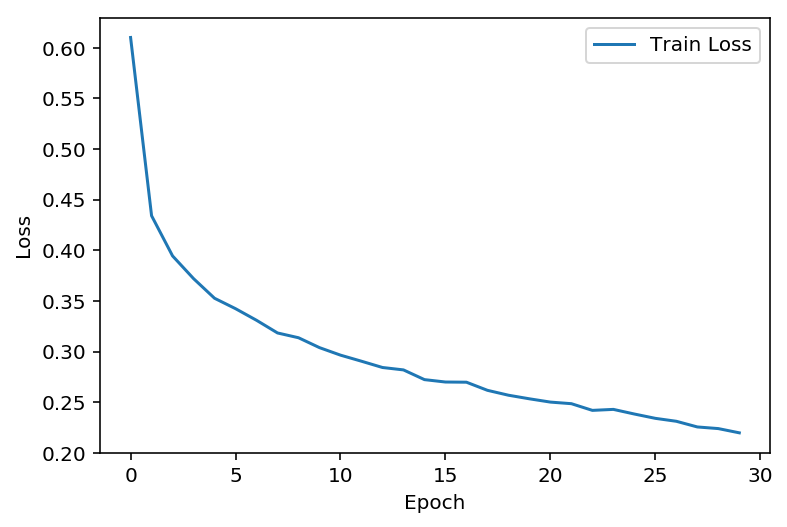

In [162]:
plt.plot(ep, losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

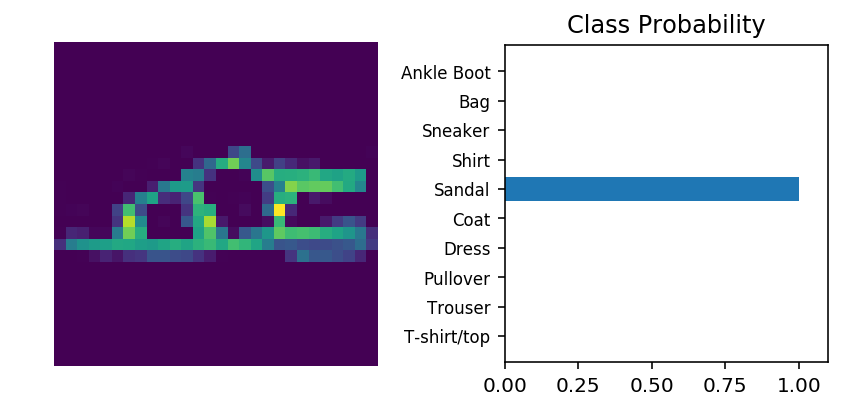

In [163]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

## Validation

In [164]:
import warnings
warnings.filterwarnings('ignore')
images, labels = next(iter(testloader))
ps = torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [0]:
top_p,top_class = ps.topk(1, dim=1)
equals = top_class == labels.view(top_class.shape)

In [166]:
print("Accuracy:",torch.mean(equals.type(torch.FloatTensor)).item() * 100,"%")

Accuracy: 87.5 %


## Validation Pass

In [173]:
epochs = 30
testlosses = []
testacc = []
ep = []
for e in range(epochs):
    testloss = 0
    accuracy = 0
    with torch.no_grad():
        model.eval() #disables dropout for evaluation
        #turning off gradient for validation, saving power and memory
        for images, labels in testloader:
            log_ps = model(images)
            testloss = criterion(log_ps, labels).item()

            ps = torch.exp(log_ps)
            top_p,top_class = ps.topk(1,dim=1)
            equals = top_class == labels.view(top_class.shape)
            accuracy = torch.mean(equals.type(torch.FloatTensor)).item()
    print("Epoch:",e,"Test Loss:",testloss,"Accuracy:",accuracy)
    ep.append(e)
    testacc.append(accuracy)
    testlosses.append(testloss)

Epoch: 0 Test Loss: 0.07316051423549652 Accuracy: 1.0
Epoch: 1 Test Loss: 0.4080272614955902 Accuracy: 0.9375
Epoch: 2 Test Loss: 0.2454328089952469 Accuracy: 0.9375
Epoch: 3 Test Loss: 0.512229859828949 Accuracy: 0.9375
Epoch: 4 Test Loss: 0.4107036590576172 Accuracy: 0.8125
Epoch: 5 Test Loss: 0.2650076448917389 Accuracy: 0.9375
Epoch: 6 Test Loss: 0.6343746185302734 Accuracy: 0.6875
Epoch: 7 Test Loss: 0.31752169132232666 Accuracy: 0.9375
Epoch: 8 Test Loss: 0.07013145089149475 Accuracy: 0.9375
Epoch: 9 Test Loss: 0.10190552473068237 Accuracy: 1.0
Epoch: 10 Test Loss: 0.5425612330436707 Accuracy: 0.8125
Epoch: 11 Test Loss: 0.8416795134544373 Accuracy: 0.6875
Epoch: 12 Test Loss: 0.2260284125804901 Accuracy: 0.875
Epoch: 13 Test Loss: 0.4035946726799011 Accuracy: 0.875
Epoch: 14 Test Loss: 0.1085028201341629 Accuracy: 0.9375
Epoch: 15 Test Loss: 0.8000859022140503 Accuracy: 0.8125
Epoch: 16 Test Loss: 1.0326080322265625 Accuracy: 0.75
Epoch: 17 Test Loss: 0.26780465245246887 Accurac

In [175]:
len(testloader)

157

In [176]:
model.train() #set model back to train mode

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)

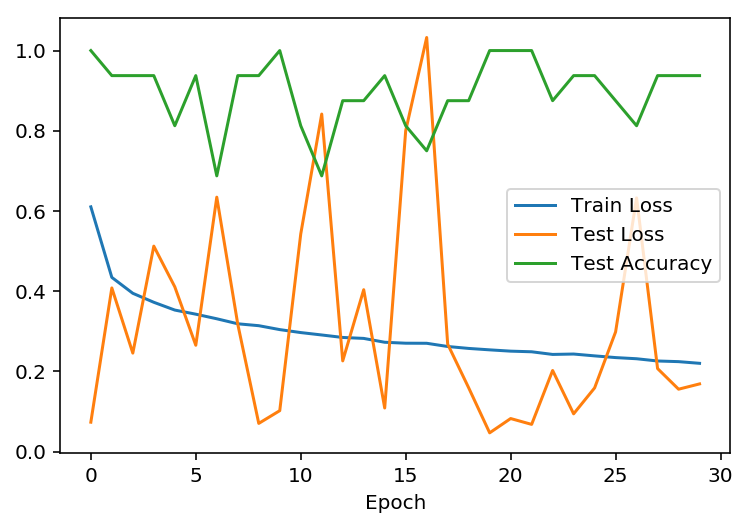

In [177]:
plt.plot(ep, losses, label='Train Loss')
plt.plot(ep, testlosses, label='Test Loss')
plt.plot(ep, testacc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [178]:
print(model)
print(model.state_dict().keys())

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)
odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


## Saving The Model

In [0]:
#----SAVE & LOAD UTILITIES
path = './fashion_mnist_checkpoint.pth'

def save_model(model,path,verbose=True):
    checkpoint = {
        'parameters':model.parameters,
        'state_dict':model.state_dict()
    }
    if verbose:
        print("Checkpoint created..")
    torch.save(checkpoint,path)
    if verbose:
        print("Checkpoint saved..")

def load_model(path):
    try:
        checkpoint = torch.load(path)
    except Exception as err:
        print(err)
        return None
    model = Network()
    model.parameters = checkpoint['parameters']
    model.load_state_dict(checkpoint['state_dict'])
    return model

In [180]:
save_model(model,path)

Checkpoint created..
Checkpoint saved..
